In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
df=pd.read_csv('data/MBA.csv')
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [144]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [145]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


None

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [146]:
df.columns

Index(['application_id', 'gender', 'international', 'gpa', 'major', 'race',
       'gmat', 'work_exp', 'work_industry', 'admission'],
      dtype='object')

In [147]:
df.drop('application_id',inplace=True,axis=1)
df
df.columns

Index(['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp',
       'work_industry', 'admission'],
      dtype='object')

In [148]:
df.loc[df['international']==True,'race']='international'
df.drop('international',inplace=True,axis=1)
df

,gender,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,Female,3.30,Business,international,710.0,5.0,Technology,Admit
3,Male,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...
6189,Male,3.49,Business,White,640.0,5.0,Other,NaN
6190,Male,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,Female,3.22,Business,international,680.0,5.0,Health Care,Admit
6192,Male,3.36,Business,international,590.0,5.0,Other,NaN


In [149]:
df.isna().sum()

gender              0
gpa                 0
major               0
race                0
gmat                0
work_exp            0
work_industry       0
admission        5194
dtype: int64

In [150]:
df['admission'].unique()

array(['Admit', nan, 'Waitlist'], dtype=object)

In [151]:
df.loc[df['admission']=='Waitlist','admission']='Decline'
display(df)
df['admission'].unique()

,gender,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,Female,3.30,Business,international,710.0,5.0,Technology,Admit
3,Male,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...
6189,Male,3.49,Business,White,640.0,5.0,Other,NaN
6190,Male,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,Female,3.22,Business,international,680.0,5.0,Health Care,Admit
6192,Male,3.36,Business,international,590.0,5.0,Other,NaN


array(['Admit', nan, 'Decline'], dtype=object)

In [152]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   gpa            6194 non-null   float64
 2   major          6194 non-null   object 
 3   race           6194 non-null   object 
 4   gmat           6194 non-null   float64
 5   work_exp       6194 non-null   float64
 6   work_industry  6194 non-null   object 
 7   admission      1000 non-null   object 
dtypes: float64(3), object(5)
memory usage: 387.3+ KB


None

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


In [153]:
df['gender'].describe()

count     6194
unique       2
top       Male
freq      3943
Name: gender, dtype: object

In [154]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
l_encoder=LabelEncoder()
l_encoder.fit(df['gender'])
df['gender_label']=l_encoder.transform(df['gender'])
df

,gender,gpa,major,race,gmat,work_exp,work_industry,admission,gender_label
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,Admit,0
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN,1
2,Female,3.30,Business,international,710.0,5.0,Technology,Admit,0
3,Male,3.47,STEM,Black,690.0,6.0,Technology,NaN,1
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN,1
...,...,...,...,...,...,...,...,...,...
6189,Male,3.49,Business,White,640.0,5.0,Other,NaN,1
6190,Male,3.18,STEM,Black,670.0,4.0,Consulting,NaN,1
6191,Female,3.22,Business,international,680.0,5.0,Health Care,Admit,0
6192,Male,3.36,Business,international,590.0,5.0,Other,NaN,1


In [158]:
# One-hot Encoding 
from sklearn.preprocessing import OneHotEncoder
df_encoded=pd.get_dummies(df,columns=['major','race','work_industry'],dtype=int)
display(df_encoded)
display(df)

,gender,gpa,gmat,work_exp,admission,gender_label,major_Business,major_Humanities,major_STEM,race_Asian,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,Female,3.30,620.0,3.0,Admit,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Male,3.28,680.0,5.0,NaN,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Female,3.30,710.0,5.0,Admit,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Male,3.47,690.0,6.0,NaN,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Male,3.35,590.0,5.0,NaN,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,Male,3.49,640.0,5.0,NaN,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6190,Male,3.18,670.0,4.0,NaN,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6191,Female,3.22,680.0,5.0,Admit,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6192,Male,3.36,590.0,5.0,NaN,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


,gender,gpa,major,race,gmat,work_exp,work_industry,admission,gender_label
0,Female,3.30,Business,Asian,620.0,3.0,Financial Services,Admit,0
1,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN,1
2,Female,3.30,Business,international,710.0,5.0,Technology,Admit,0
3,Male,3.47,STEM,Black,690.0,6.0,Technology,NaN,1
4,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN,1
...,...,...,...,...,...,...,...,...,...
6189,Male,3.49,Business,White,640.0,5.0,Other,NaN,1
6190,Male,3.18,STEM,Black,670.0,4.0,Consulting,NaN,1
6191,Female,3.22,Business,international,680.0,5.0,Health Care,Admit,0
6192,Male,3.36,Business,international,590.0,5.0,Other,NaN,1


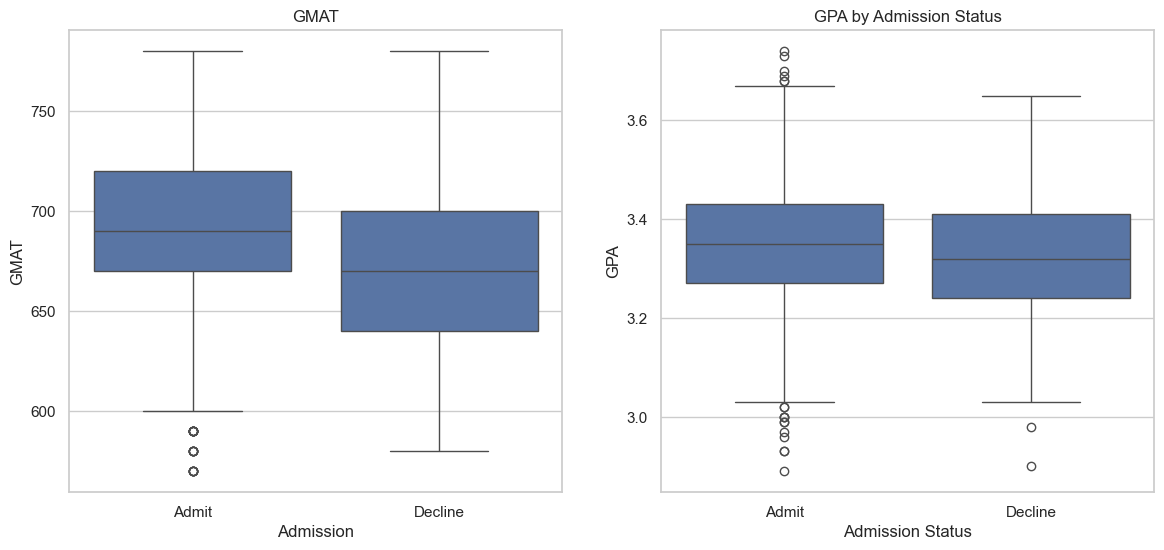

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# gmat에 따른 합격 여부
plt.subplot(1, 2, 1)
sns.boxplot(x='admission', y='gmat', data=df)
plt.title('GMAT')
plt.xlabel('Admission')
plt.ylabel('GMAT')

# gpa에 따른 합격 여부
plt.subplot(1, 2, 2)
sns.boxplot(x='admission', y='gpa', data=df)
plt.title('GPA by Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('GPA')
plt.show()


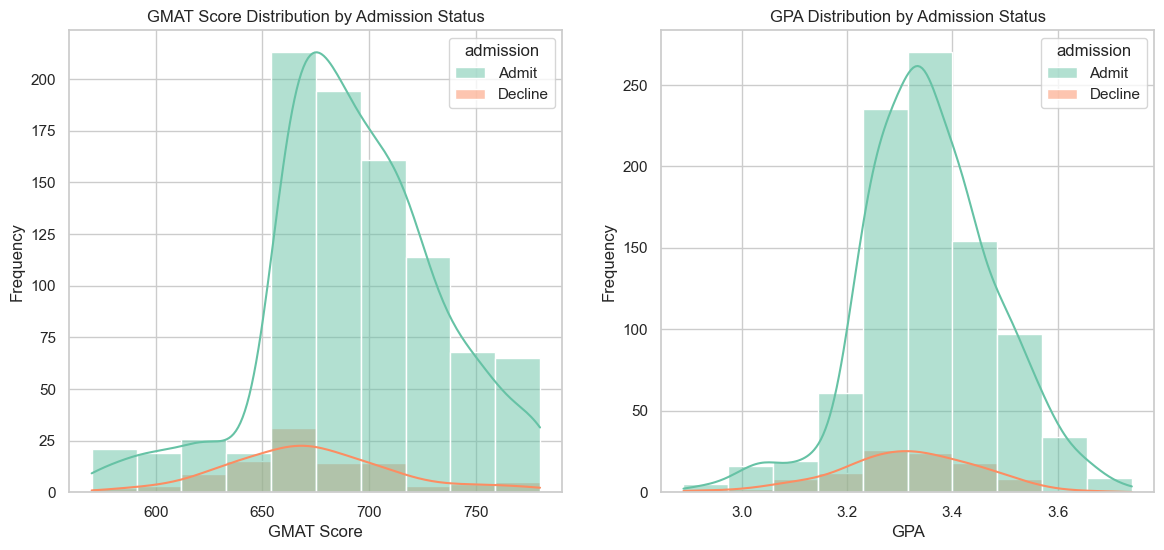

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# gmat 점수 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='gmat', hue='admission', kde=True, bins=10, palette='Set2')
plt.title('GMAT Score Distribution by Admission Status')
plt.xlabel('GMAT Score')
plt.ylabel('Frequency')

# gpa 점수 히스토그램
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='gpa', hue='admission', kde=True, bins=10, palette='Set2')
plt.title('GPA Distribution by Admission Status')
plt.xlabel('GPA')
plt.ylabel('Frequency')

plt.show()

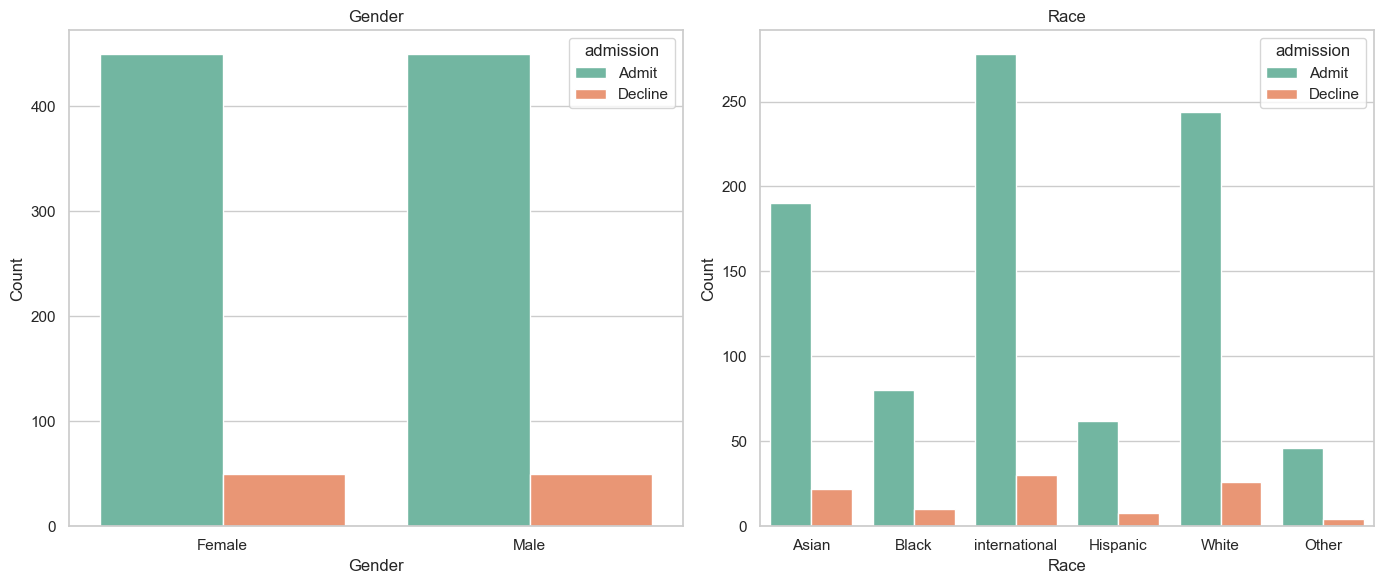

In [168]:
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='gender', hue='admission', data=df, palette='Set2')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='race', hue='admission', data=df, palette='Set2')
plt.title('Race')
plt.xlabel('Race')
plt.ylabel('Count')

# 그래프 출력
plt.tight_layout()
plt.show()
